ЗАДАНИЯ

1.Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

2.Постройте график по числу поездок по дате и времени.

3.Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

4.Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

5.Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

6.Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

7.Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.

8.Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [116]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

In [117]:
sns.set(
    font_scale = 2, 
    style = "whitegrid", 
    rc = {'figure.figsize':(30,20)})

In [118]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-tulnikov-27/STATISTIKA/london.csv', parse_dates=['timestamp'])

In [119]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [120]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [121]:
df.shape

(17414, 10)

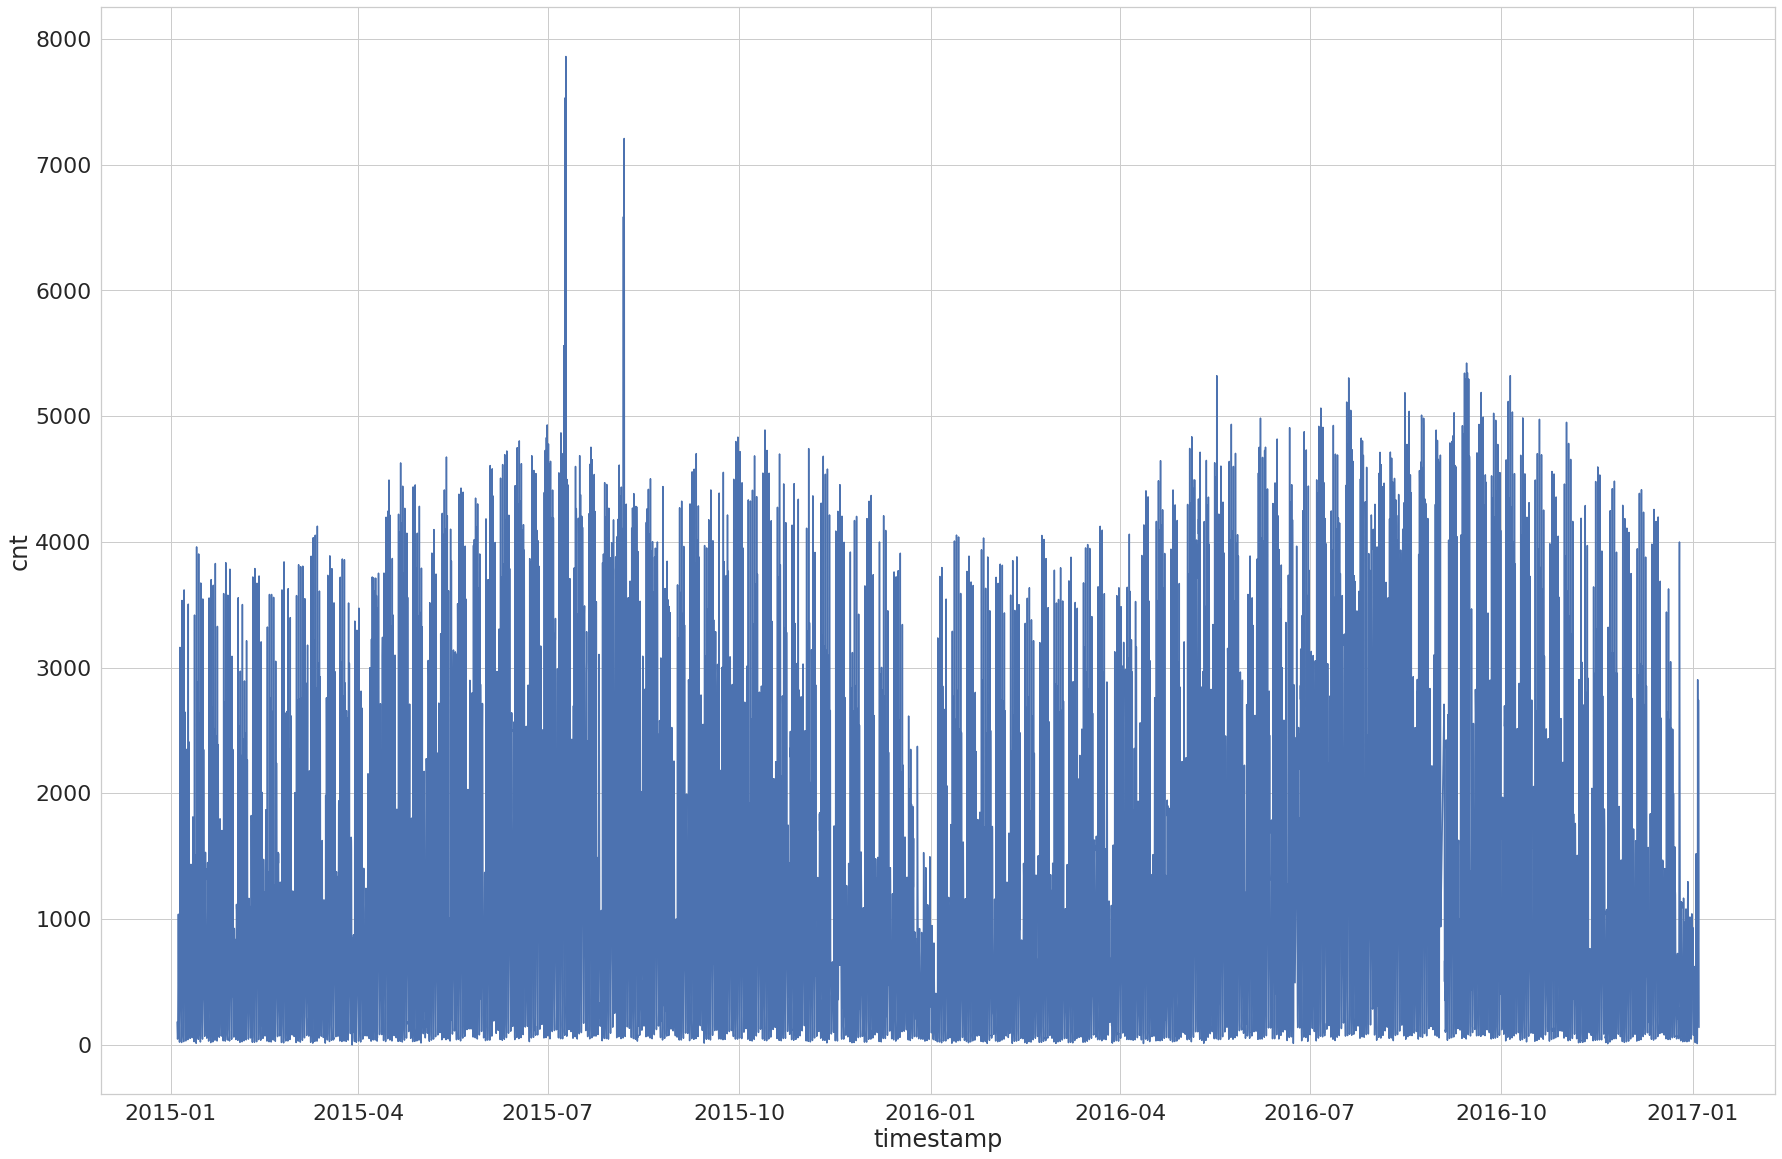

In [122]:
sns.lineplot(x = 'timestamp', y = 'cnt', data = df)

In [123]:
df = df.set_index('timestamp').sort_values('timestamp')

In [124]:
t = df.resample(rule='D').agg({'cnt':'sum'})

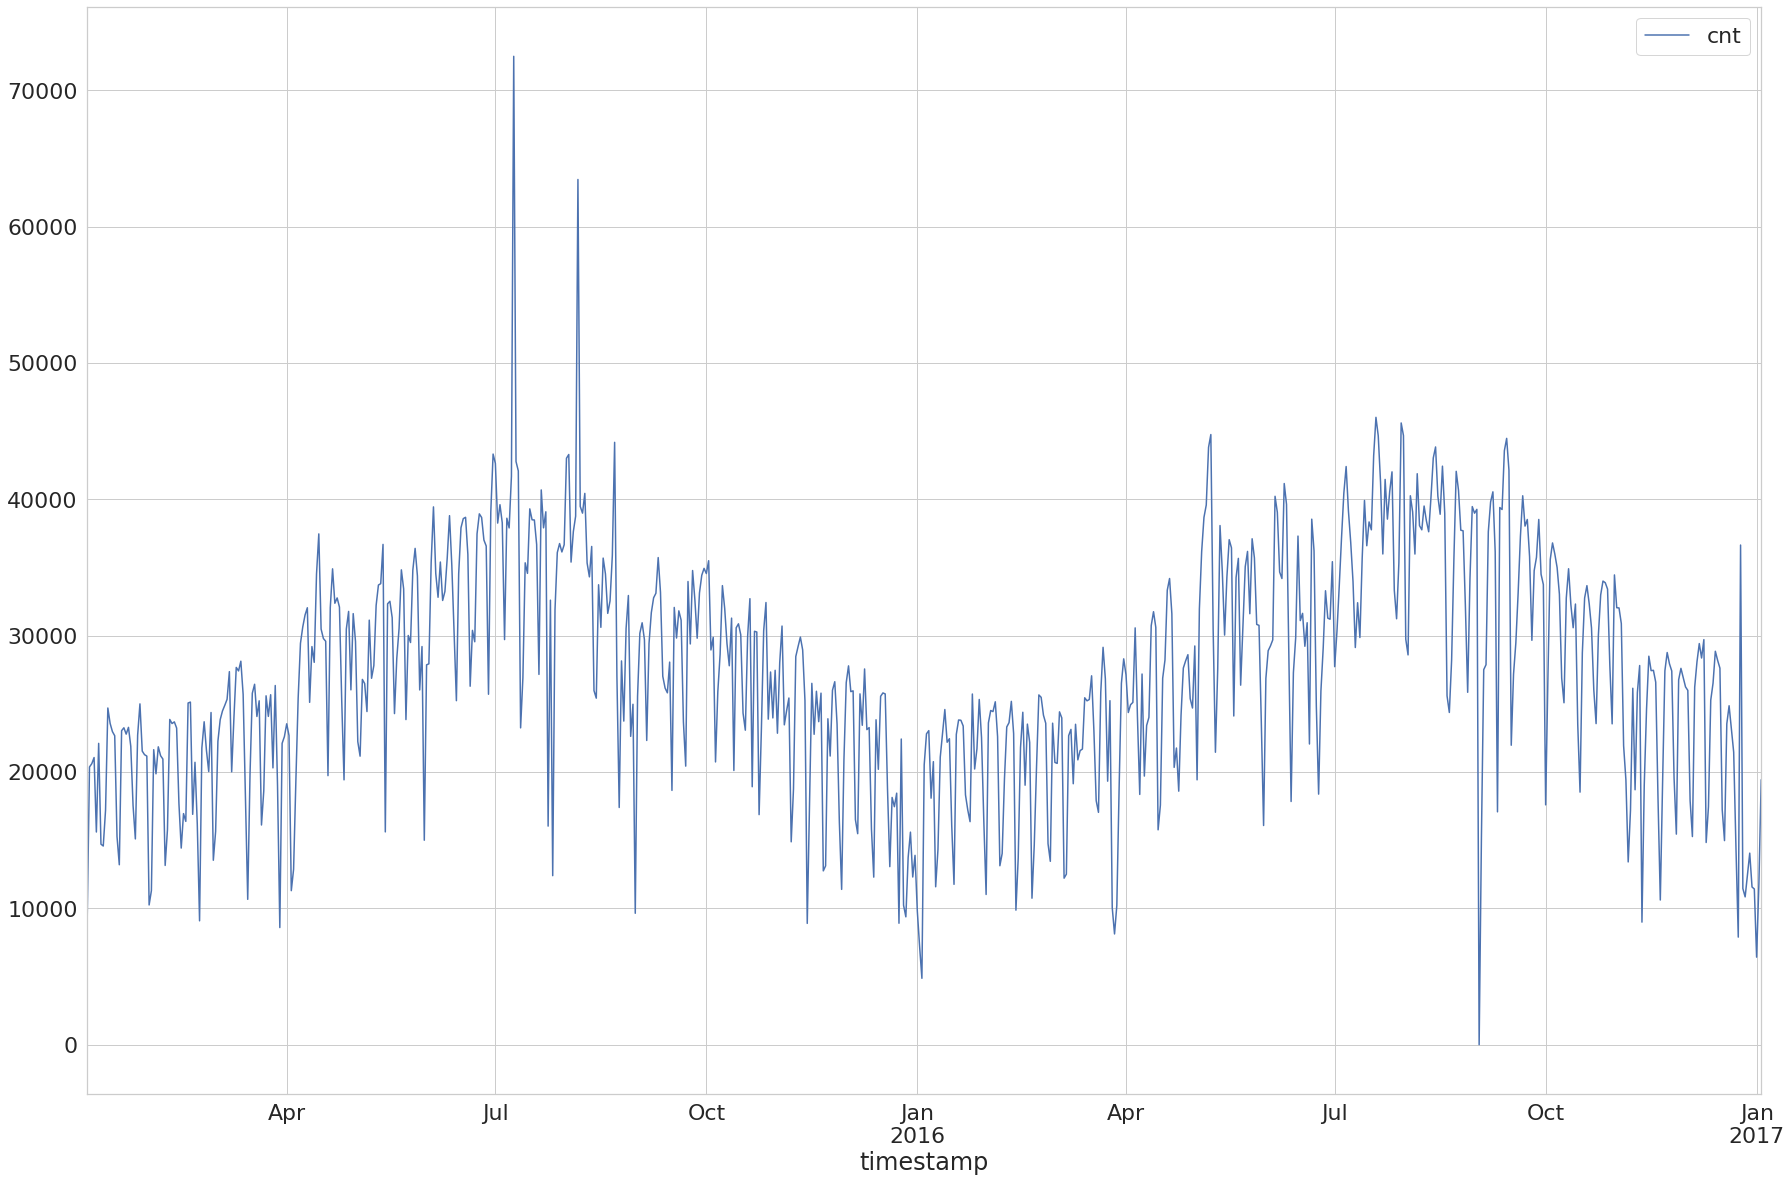

In [125]:
df.resample(rule='D').agg({'cnt':'sum'}).plot()

In [136]:
t = t.reset_index()

In [132]:
rolling_mean = t.rolling(3).mean().reset_index()

In [133]:
rolling_mean.query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


In [170]:
difference = t.merge(rolling_mean, on = 'timestamp')

In [171]:
difference = difference.rename(columns = {'cnt_y': 'rolling_mean'})

In [184]:
std = np.std(difference.cnt_x - difference.rolling_mean)

In [185]:
std

4558.58664111794

In [186]:
difference['upper_bound'] = (difference.rolling_mean + 2.576 * std).round(2)

In [187]:
difference['lower_bound'] = (difference.rolling_mean - 2.576 * std).round(2)

In [188]:
difference

,timestamp,cnt_x,rolling_mean,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,28482.59,4996.75
3,2015-01-07,21064,20683.000000,32425.92,8940.08
4,2015-01-08,15601,19092.666667,30835.59,7349.75
...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,24424.92,939.08
727,2016-12-31,11424,12347.333333,24090.25,604.41
728,2017-01-01,6421,9803.666667,21546.59,-1939.25
729,2017-01-02,11823,9889.333333,21632.25,-1853.59


Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

Была забастовка 

In [195]:
difference.query('cnt_x > upper_bound')

,timestamp,cnt_x,rolling_mean,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.92,38962.08
214,2015-08-06,63468,46627.333333,58370.25,34884.41
609,2016-09-04,27512,14259.000000,26001.92,2516.08
721,2016-12-25,36653,19650.666667,31393.59,7907.75


Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

Ошибка при сборе данных

In [191]:
difference.query('cnt_x < lower_bound')

,timestamp,cnt_x,rolling_mean,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,40452.25,16966.41
189,2015-07-12,23240,36036.666667,47779.59,24293.75
201,2015-07-24,16034,31013.666667,42756.59,19270.75
232,2015-08-24,17400,29529.333333,41272.25,17786.41
314,2015-11-14,8898,21037.333333,32780.25,9294.41
607,2016-09-02,0,26086.333333,37829.25,14343.41
615,2016-09-10,17080,31262.000000,43004.92,19519.08
621,2016-09-16,21967,36193.333333,47936.25,24450.41
678,2016-11-12,8990,20878.000000,32620.92,9135.08


In [193]:
df.query('timestamp == "2016-09-02"')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
